# 非线性最小二乘法

[1] 1195.449
[1] 212.68384222   0.06412146


[1] 7.173465199 0.008744815

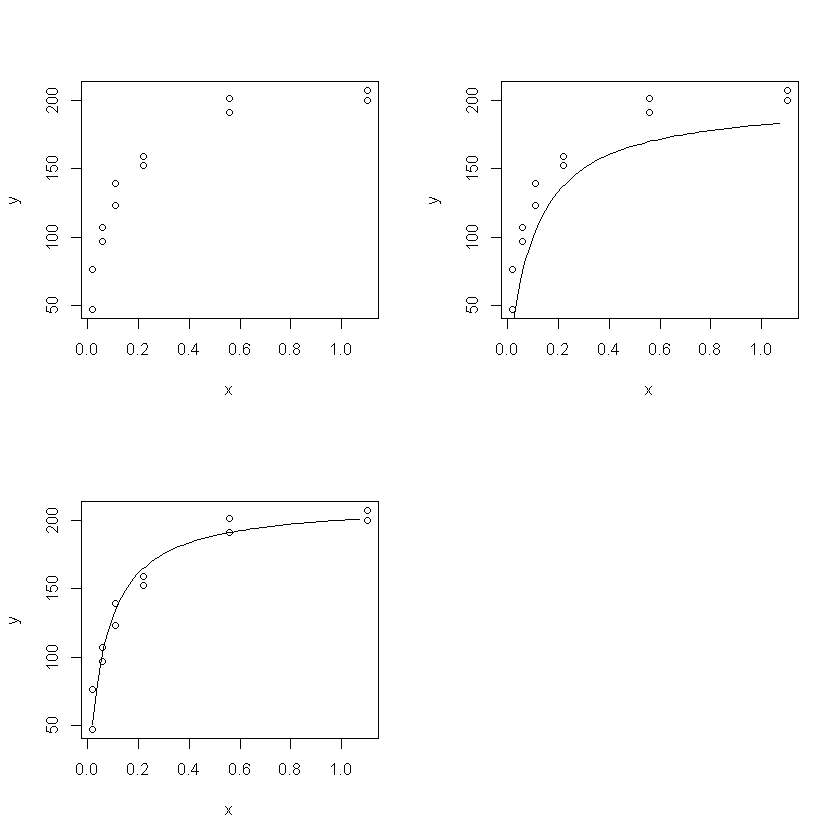

In [1]:
par(mfrow=c(2,2))
# 数据与被拟合的模型
x <- c(0.02, 0.02, 0.06, 0.06, 0.11, 0.11, 0.22,       
       0.22, 0.56, 0.56,1.10, 1.10)
y <- c(76, 47, 97, 107, 123, 139, 159, 152, 191,       
       201, 207, 200)
fn <- function(p) sum((y-(p[1] * x)/(p[2] + x))^2)
# 画出数据
plot(x,y)
# 估计参数值并对比
xfit <- seq(.02, 1.1, .05)
yfit <- 200 * xfit/(0.1 + xfit)
plot(x, y)
lines(spline(xfit,yfit))
# 做拟合
out <- nlm(fn, p = c(200, 0.1), hessian = TRUE)
# 误差的平方和 SSE
print(out$minimum)
# 参数的最小二乘估计
print(out$estimate)
# 标准误 SE
sqrt(diag(2*out$minimum/(length(y) - 2) * solve(out$hessian)))
# 画出估计参数的拟合情况
plot(x, y)
xfit <- seq(.02, 1.1, .05)
yfit <- 212.68384222 * xfit/(0.06412146 + xfit)
lines(spline(xfit, yfit))

# 非线性最大似然法

In [2]:
x <- c(1.6907, 1.7242, 1.7552, 1.7842, 1.8113,
       1.8369, 1.8610, 1.8839)
y <- c(6, 13, 18, 28, 52, 53, 61, 60)
n <- c(59, 60, 62, 56, 63, 59, 62, 60)
fn <- function(p)    
    sum( - (y*(p[1]+p[2]*x) -
            n*log(1+exp(p[1]+p[2]*x)) +
            log(choose(n, y)) ))
# 选择一个适当的初始值，开始拟合
out <- nlm(fn, p = c(-50,20), hessian = TRUE)
sqrt(diag(solve(out$hessian)))

Warning message in nlm(fn, p = c(-50, 20), hessian = TRUE):
"NA/Inf被换成最大的正值"

[1] 5.554567 3.123365

# 一些非标准模型

- 混合效应模型（mixed-effects models）的线性和非线性回归
    - nlme::lme()
    - nlme::nlme()
- 局部近似回归(Local approximating regressions)
    - loess()
- 稳健回归(Robust regression)
    - MASS::lqs
- 累加模型(Additive models)
    - acepack::avas()和ace()
    - mda::bruto()和mars()
- 广义累加模型
    - gam和mgcv
- 树型模型(Tree-based models)
    - 树型模型递归地在决定性变量的判断点上将数据的分叉分开,会把数据最终分成几个不同组,使得组内尽可能相似而组间尽可能差异
    - rpart::tree()
    - tree::tree()
    - plot()和text()可以很好的用于树型模型拟合结果的图形显示